In [2]:
# Setup and Dependencies
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create engine and pass in connection to postgres
engine = create_engine('postgres://<PASSWORD_PLEASE>@localhost:5432/sql_project_employees')
conn = engine.connect()

In [5]:
# Query the data in salaries and titles postgres tables 
# Salaries table
salaries_df = pd.read_sql("SELECT * FROM salaries", conn)
salaries_df.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [6]:
salaries_df['salary'].describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

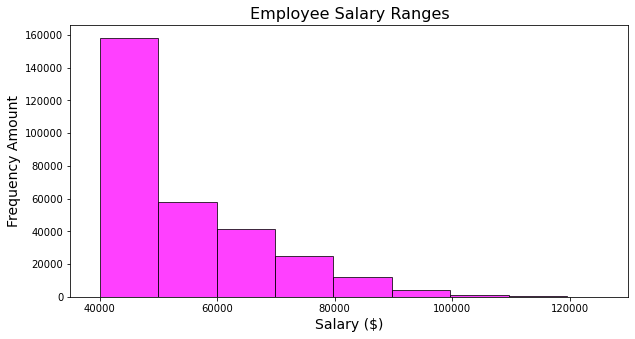

In [7]:
# Histogram showing most common salary ranges for employees

plt.rcParams['figure.figsize']=(10,5)
plt.hist(salaries_df['salary'], bins=9, alpha=0.75, color='fuchsia', edgecolor='black')
plt.title("Employee Salary Ranges", fontsize=16)
plt.xlabel("Salary ($)", fontsize=14)
plt.ylabel("Frequency Amount", fontsize=14)
plt.xlim(35000, 130000)

plt.savefig("../ExployeeSQL/salary_ranges.png")

plt.show()

In [8]:
# Titles table
titles_df = pd.read_sql("SELECT * FROM titles", conn)
titles_df.head(10)

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [9]:
employees_df = pd.read_sql("SELECT * FROM employees", conn)
employees_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [10]:
combined_emp_sal = pd.merge(employees_df, salaries_df, on="emp_no", how="inner")
combined_emp_sal.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [11]:
combined_emp_title = pd.merge(titles_df, employees_df, on="title_id", how="inner")
combined_emp_title.head()

,title_id,title,emp_no,birth_date,first_name,last_name,sex,hire_date
0,s0001,Staff,473302,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,s0001,Staff,421786,1957-09-28,Xiong,Verhoeff,M,1987-11-26
2,s0001,Staff,273487,1957-04-14,Christoph,Parfitt,M,1991-06-28
3,s0001,Staff,246449,1958-03-23,Subbu,Bultermann,F,1988-03-25
4,s0001,Staff,48085,1964-01-19,Venkatesan,Gilg,M,1993-06-28


In [12]:
combined_df = pd.merge(combined_emp_sal, combined_emp_title, on="emp_no", how="inner")
combined_df.head()

,emp_no,title_id_x,birth_date_x,first_name_x,last_name_x,sex_x,hire_date_x,salary,title_id_y,title,birth_date_y,first_name_y,last_name_y,sex_y,hire_date_y
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,s0001,Staff,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422,e0002,Engineer,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973,e0002,Engineer,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,s0001,Staff,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000,e0003,Senior Engineer,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [13]:
# Show the average salaries for each title
group_df = combined_df.groupby("title").mean()

# Drop employee number column and reset the index
re_group_df = group_df.drop(columns="emp_no").reset_index()

# Round salaries to two decimal places
re_grouped = round(re_group_df, 2)

# Display the dataframe
re_grouped

,title,salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


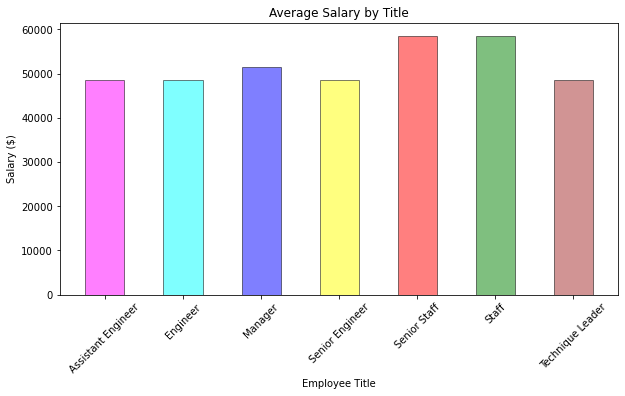

In [14]:
# Bar Chart of average salary by title

x_title = re_grouped["title"]
x_ticks = np.arange(len(x_title))
y_salary = re_grouped["salary"]


plt.bar(x_title, y_salary, align="center", alpha=0.5, width=0.5, color=['fuchsia', 'cyan', 'blue', 'yellow', 'red', 'green', 'brown'], edgecolor="black")
plt.xticks(x_ticks, x_title, rotation=45)
plt.ylabel('Salary ($)')
plt.xlabel('Employee Title')
plt.title('Average Salary by Title')

plt.savefig("../ExployeeSQL/avg_title_salary.png")

plt.show()

In [15]:
# Epilogue -- Search for "My employee ID number" 499942

my_id = combined_df[combined_df["emp_no"] == 499942]
personal_data = my_id[["emp_no", "title", "first_name_x", "last_name_x", "salary", "hire_date_x"]]
personal_data.columns=["Employee Number", "Title", "First Name", "Last Name", "Salary ($)", "Hire Date"]
personal_data

,Employee Number,Title,First Name,Last Name,Salary ($),Hire Date
168736,499942,Technique Leader,April,Foolsday,40000,1997-02-10
